# Explore here

In [1]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import os
df.to_csv('../data/raw/diabetes.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
ceros = (df == 0).sum()

ceros[ceros > 0]

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64

In [8]:
column_means = df.replace(0, pd.NA).mean()
column_means

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                 29.15342
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                            1.0
dtype: object

In [9]:
df = df.mask(df == 0, df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).mean(), axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,NaN
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,NaN
4,NaN,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,155.548223,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,29.15342,155.548223,30.1,0.349,47,1


In [10]:
df = df.fillna(0)
df

/tmp/ipykernel_555/1506016063.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


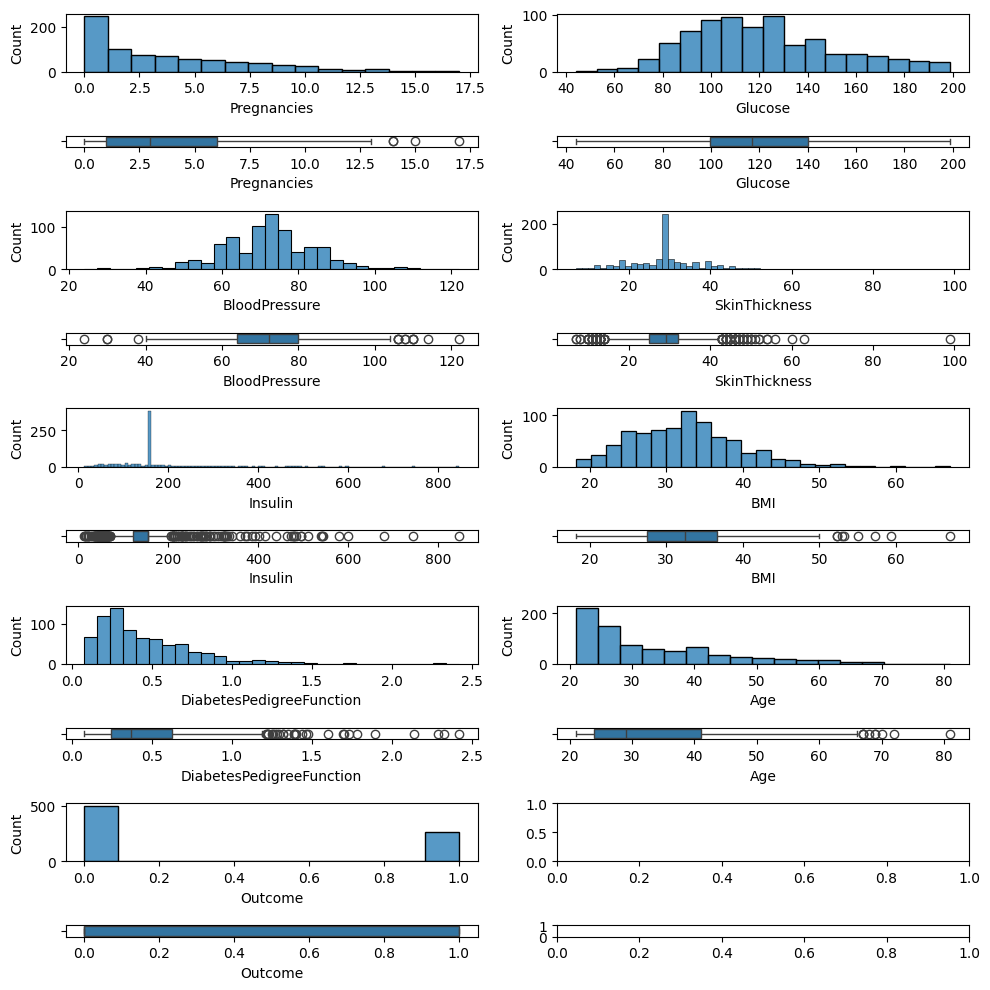

In [12]:
from Feroz import analisis_numerico_numerico
analisis_numerico_numerico(df,'Outcome')

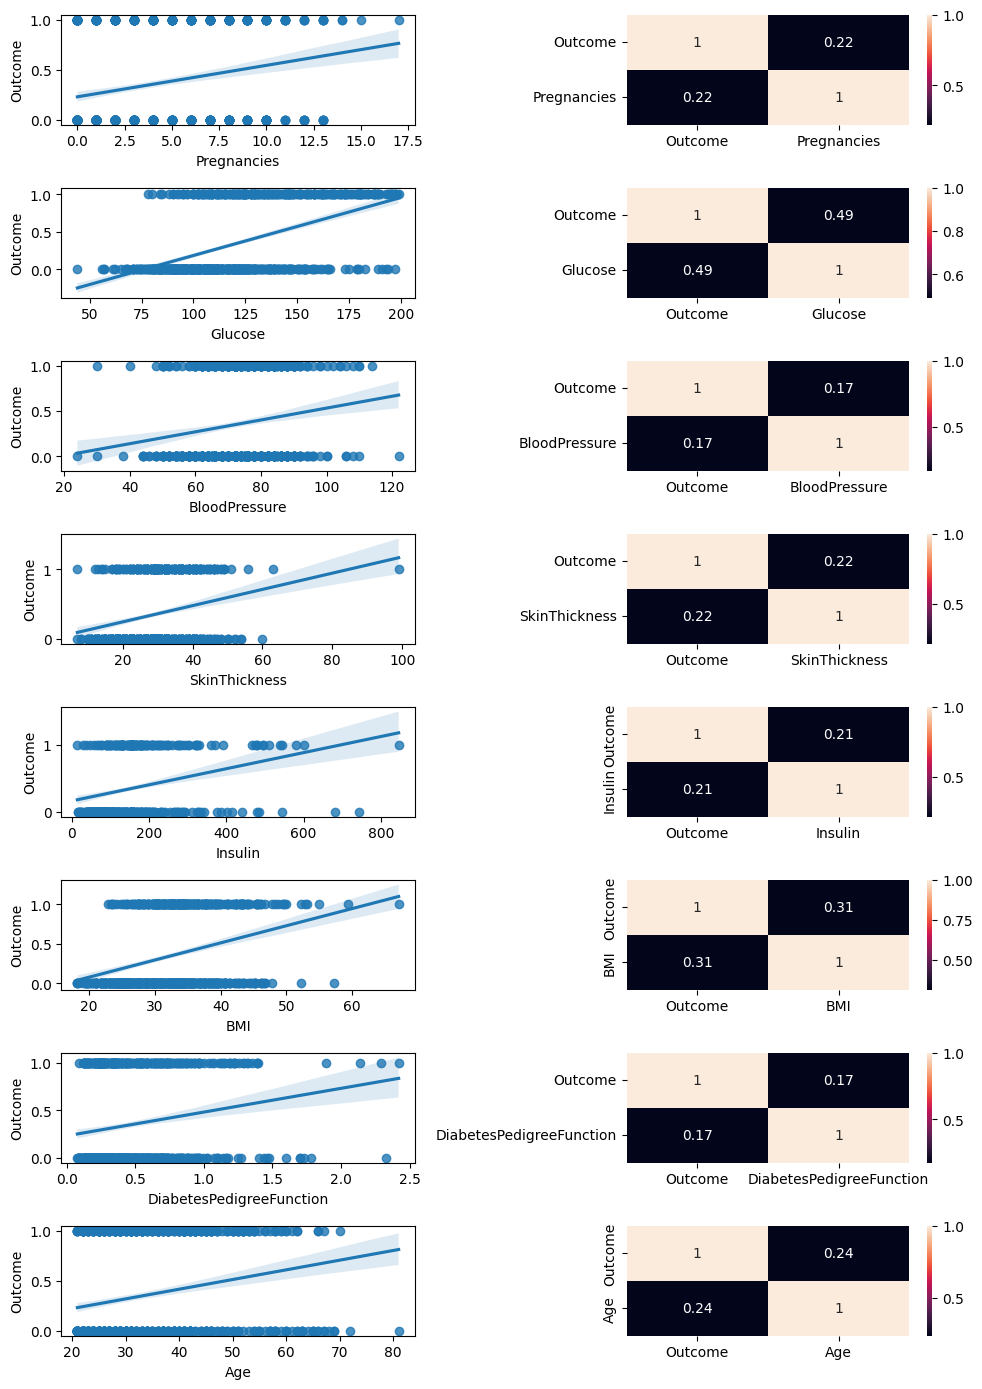

In [13]:
fig, axis = plt.subplots(8, 2, figsize=(10, 14))

sns.regplot(ax=axis[0, 0], data=df, x='Pregnancies', y='Outcome')
sns.heatmap(df[['Outcome', 'Pregnancies']].corr(), ax=axis[0, 1], annot=True)
sns.regplot(ax=axis[1, 0], data=df, x='Glucose', y='Outcome')
sns.heatmap(df[['Outcome', 'Glucose']].corr(), ax=axis[1, 1], annot=True)
sns.regplot(ax=axis[2, 0], data=df, x='BloodPressure', y='Outcome')
sns.heatmap(df[['Outcome', 'BloodPressure']].corr(), ax=axis[2, 1], annot=True)
sns.regplot(ax=axis[3, 0], data=df, x='SkinThickness', y='Outcome')
sns.heatmap(df[['Outcome', 'SkinThickness']].corr(), ax=axis[3, 1], annot=True)
sns.regplot(ax=axis[4, 0], data=df, x='Insulin', y='Outcome')
sns.heatmap(df[['Outcome', 'Insulin']].corr(), ax=axis[4, 1], annot=True)
sns.regplot(ax=axis[5, 0], data=df, x='BMI', y='Outcome')
sns.heatmap(df[['Outcome', 'BMI']].corr(), ax=axis[5, 1], annot=True)
sns.regplot(ax=axis[6, 0], data=df, x='DiabetesPedigreeFunction', y='Outcome')
sns.heatmap(df[['Outcome', 'DiabetesPedigreeFunction']].corr(), ax=axis[6, 1], annot=True)
sns.regplot(ax=axis[7, 0], data=df, x='Age', y='Outcome')
sns.heatmap(df[['Outcome', 'Age']].corr(), ax=axis[7, 1], annot=True)

plt.tight_layout()
plt.show()

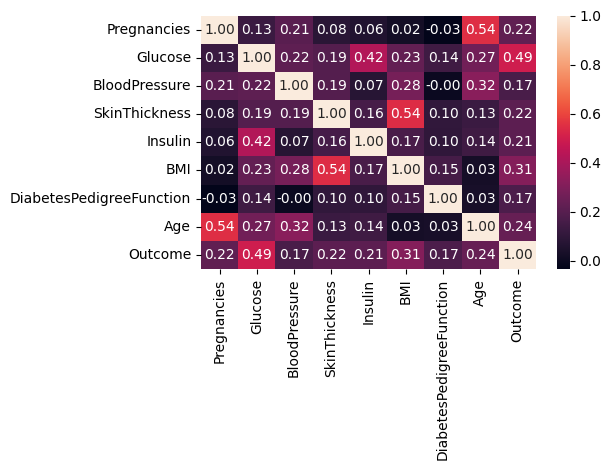

In [14]:
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.tight_layout()
plt.show()

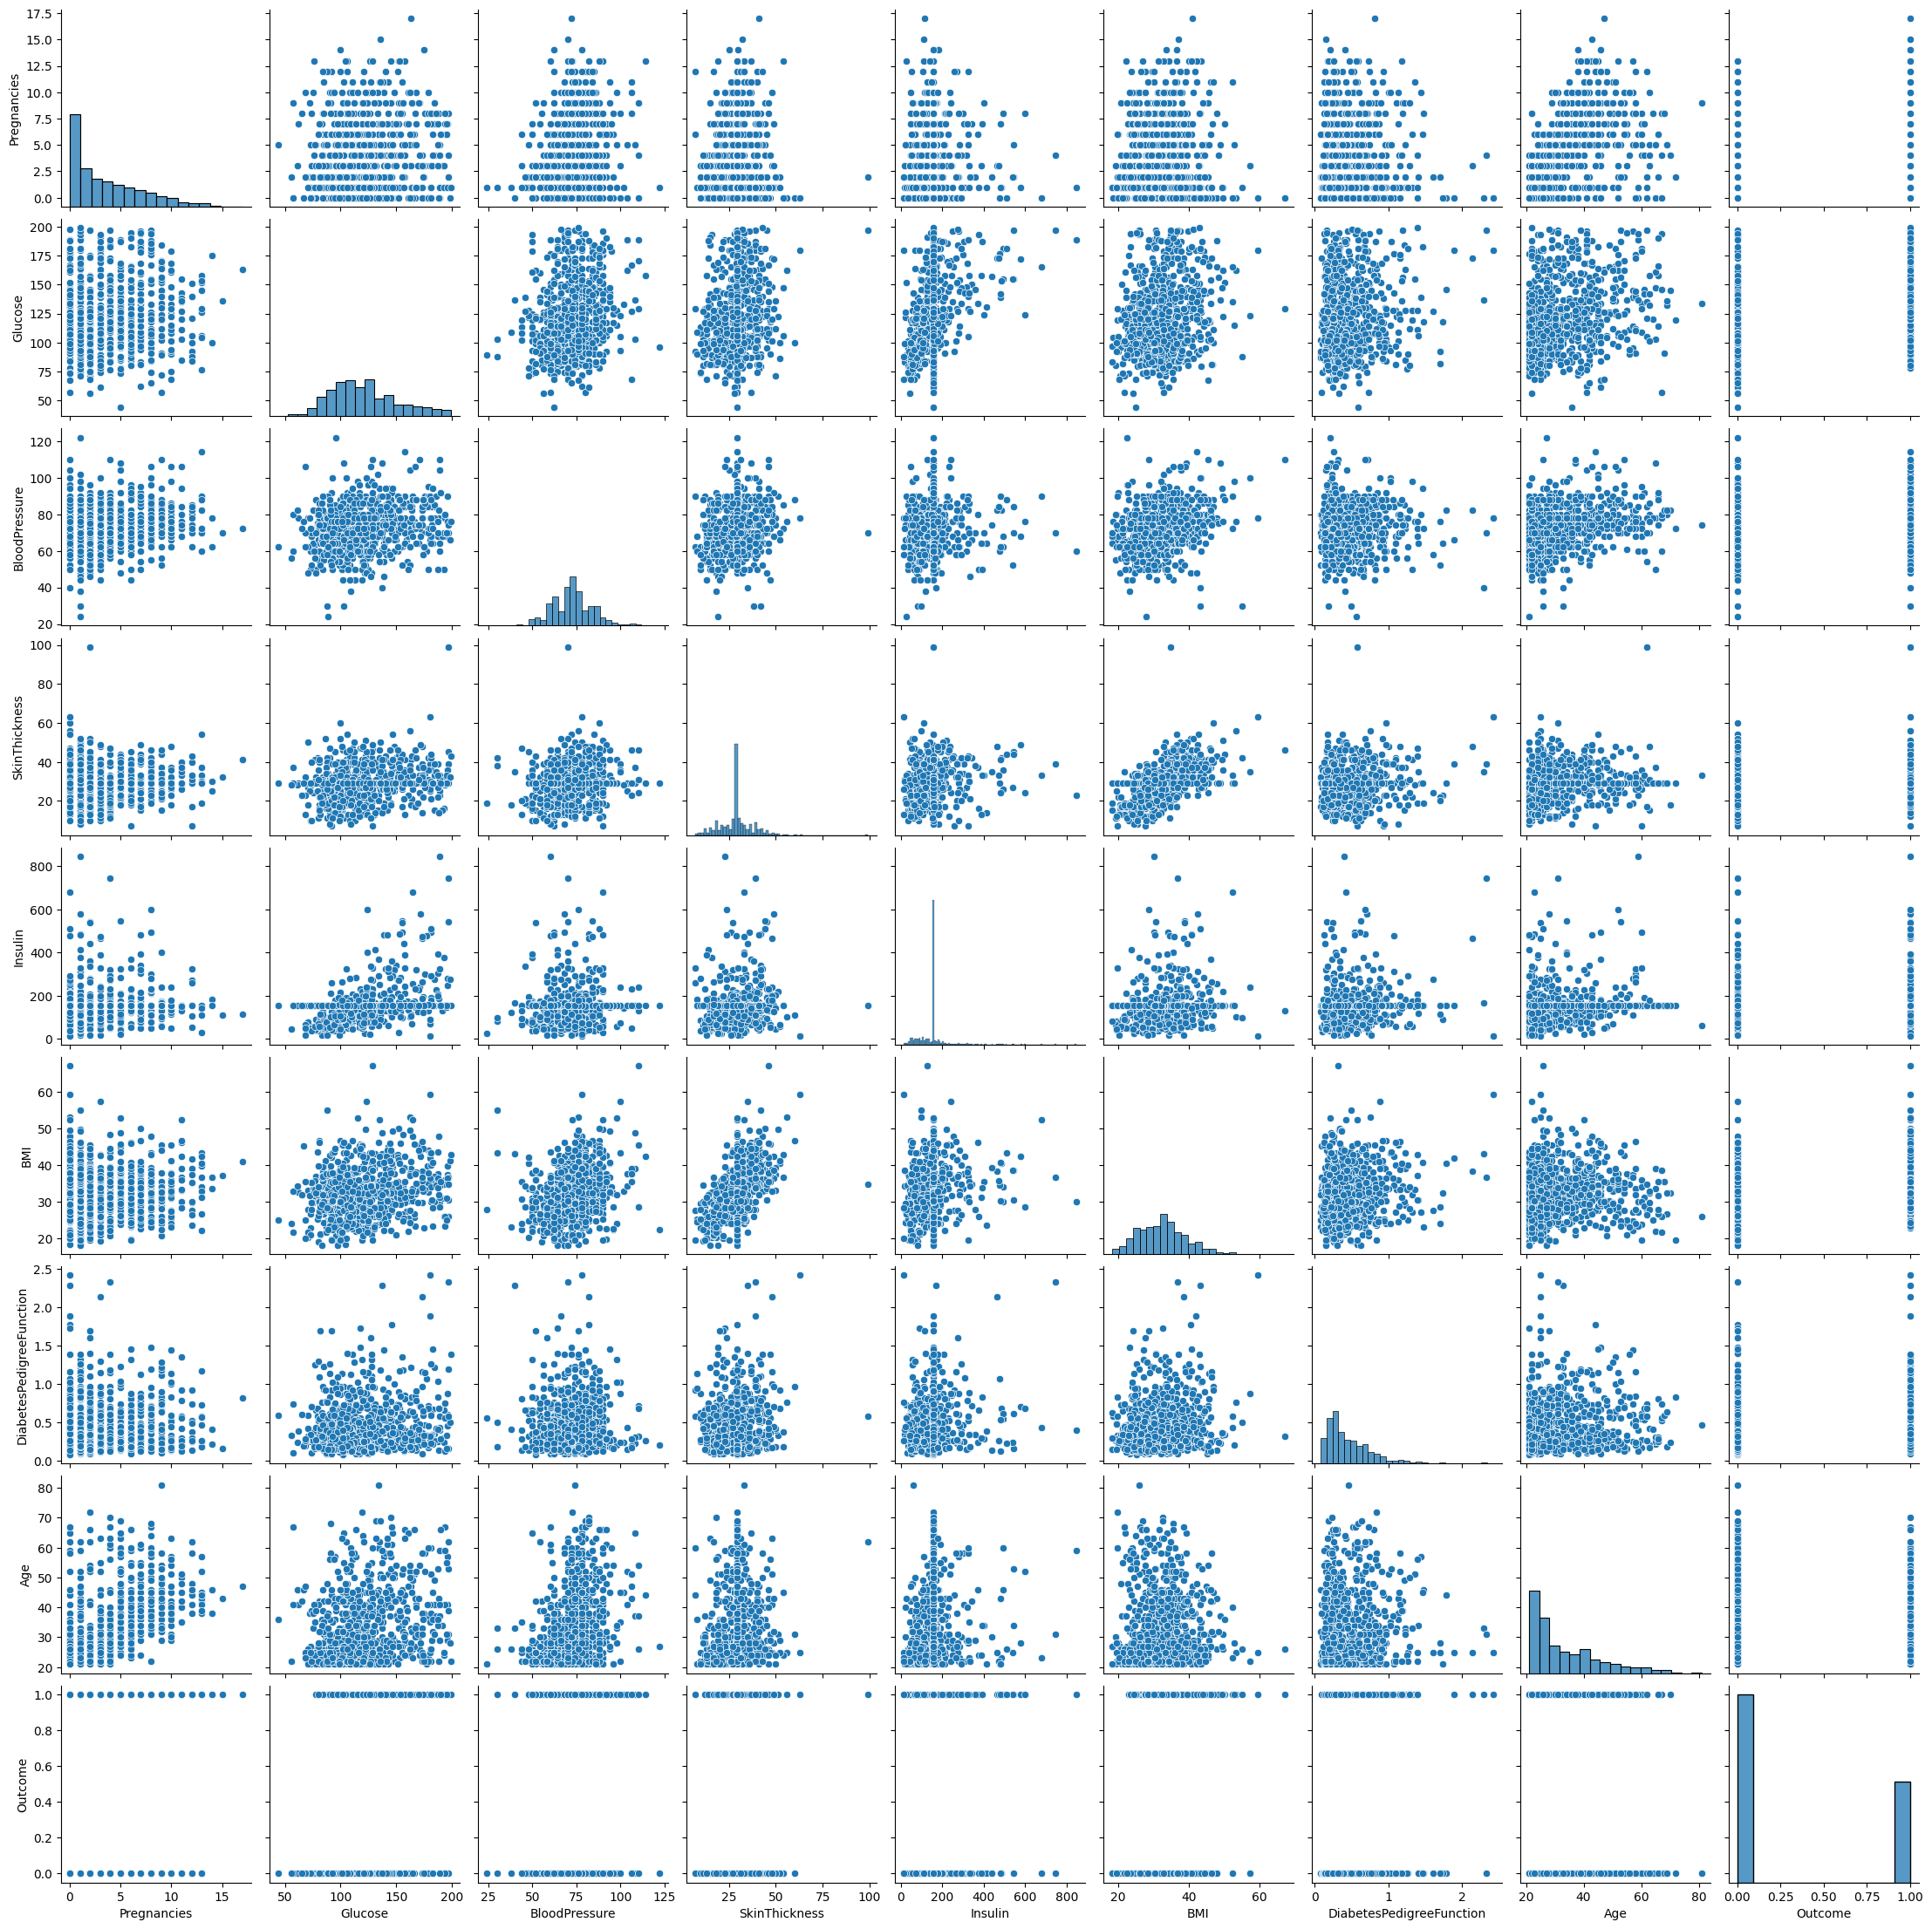

In [15]:
sns.pairplot(data=df)
plt.tight_layout
plt.show()

In [16]:
from Feroz import analisis_ric
analisis_ric(df=df)

columna: Pregnancies limites superior 13.5 e inferior -6.5
columna: Glucose limites superior 201.0 e inferior 39.0
columna: BloodPressure limites superior 104.0 e inferior 40.0
columna: SkinThickness limites superior 42.5 e inferior 14.5
columna: Insulin limites superior 206.62055837563452 e inferior 70.42766497461929
columna: BMI limites superior 50.25 e inferior 13.849999999999998
columna: DiabetesPedigreeFunction limites superior 1.2 e inferior -0.32999999999999996
columna: Age limites superior 66.5 e inferior -1.5
columna: Outcome limites superior 2.5 e inferior -1.5


In [17]:
df = df[(df['Pregnancies'] >= 0) & (df['Pregnancies'] <= 13.5)]
df = df[(df['Glucose'] >= 39) & (df['Glucose'] <= 201)]
df = df[(df['BloodPressure'] >= 40) & (df['BloodPressure'] <= 104)]
df = df[(df['SkinThickness'] >= 14.5) & (df['SkinThickness'] <= 42.5)]
df = df[(df['Insulin'] >= 70.42766497461929) & (df['Insulin'] <= 206.62055837563452)]
df = df[(df['BMI'] >= 13.849999999999998) & (df['BMI'] <= 50.25)]
df = df[(df['DiabetesPedigreeFunction'] >= 0) & (df['DiabetesPedigreeFunction'] <= 1.2)]
df = df[(df['Age'] >= 0) & (df['Age'] <= 66.5)]

In [18]:
df.shape

(515, 9)

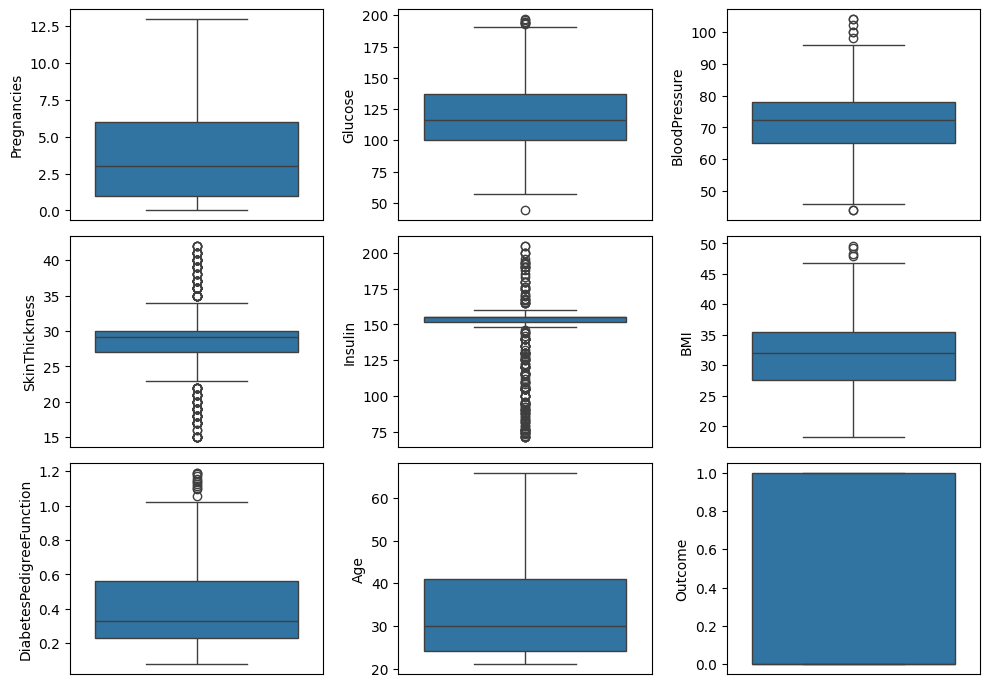

In [20]:
from Feroz import analisis_boxplot
analisis_boxplot(df,'Outcome')

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
496,5,110.0,68.000000,29.15342,155.548223,26.0,0.292,30
505,10,75.0,82.000000,29.15342,155.548223,33.3,0.263,38
266,0,138.0,72.405184,29.15342,155.548223,36.3,0.933,25
417,4,144.0,82.000000,32.00000,155.548223,38.5,0.554,37
744,13,153.0,88.000000,37.00000,140.000000,40.6,1.174,39


In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7766990291262136

In [34]:
params = {
        'learning_rate': [0.01,0.1,0.2],
        'max_depth': [3, 4, 5],
        'n_estimators' : [2,50,100,200,300]
        }  

In [35]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model,params,scoring='accuracy',n_jobs=2)
grid.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [2, 50, 100, 200, 300]},
             scoring='accuracy')

In [36]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model,params,scoring='accuracy',n_jobs=2)
grid.fit(X_train,y_train)
best_model = grid.best_estimator_

print(f'los mejores parametros son: {grid.best_params_}')
print(f'el mejor accuracy es de: {grid.best_score_}')

los mejores parametros son: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
el mejor accuracy es de: 0.7306200411401704


In [37]:
best_model.save_model('../models/xgboost_grid_search_42.json')